<div class="alert alert-block">
Проектная работа
                             
    
ПРОВЕРКА ГИПОТЕЗ (А/В -тест)

Объект исследования - интернет-магазин. 
Цель проекта -проверить гипотезы, которые могут привести к увеличению выручки, раставив приоритетность гипотез, запустить A/B-тест и проанализировать результаты 

Описание данных: В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Данные для первой части
Файл /datasets/hypothesis.csv. 

•	Hypothesis — краткое описание гипотезы;
•	Reach — охват пользователей по 10-балльной шкале;
•	Impact — влияние на пользователей по 10-балльной шкале;
•	Confidence — уверенность в гипотезе по 10-балльной шкале;
•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Данные для второй части
Файл /datasets/orders.csv. Скачать датасет
•	transactionId — идентификатор заказа;
•	visitorId — идентификатор пользователя, совершившего заказ;
•	date — дата, когда был совершён заказ;
•	revenue — выручка заказа;
•	group — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv. Скачать датасет
•	date — дата;
•	group — группа A/B-теста;
•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста
</div>

In [4]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from pandas.plotting import register_matplotlib_converters
import warnings
import matplotlib.pyplot as plt

Часть 1. Приоритизация гипотез

In [5]:
hypothes = pd.read_csv('/datasets/hypothesis.csv')

In [6]:
hypothes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


в датасете 9 гипотез, рассмотрим подробнее сами гипотезы

In [7]:
hypothes.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


дубликатов нет, данные значения целые,стоит привести названия столбцов к нижнему регистру

In [8]:
hypothes.columns= map(str.lower,hypothes.columns)
hypothes.head(9)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


для приоритизации гипотез отсортируем их по убыванию приоритета с помощью фреймворк ICE

In [9]:
hypothes['ICE']= (hypothes['impact']*hypothes['confidence']/hypothes['efforts'])
print(hypothes[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))
pd.options.display.max_colwidth = 120

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Наиболее перспективные гипотезы : 8,0,7
8 Запустить акцию, дающую скидку на товар в день рождения- такая акция несомненно привлекает всех без исключения пользователей   
0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - это похоже на практические шаги к успеху  
7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - в предидущих проектах такая рассылка помогала увеличивать посещаемость сайтов и конверсию пользователей  
6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию- распродажи всегда интересны 

Применим фреймворк RICE для приоритизации гипотез отсортируйте их по убыванию приоритета

In [10]:
hypothes['RICE']=(hypothes['reach']*hypothes['impact']*hypothes['confidence'])/hypothes['efforts']
print(hypothes [['hypothesis','RICE']].sort_values(by='RICE', ascending=False))
pd.options.display.max_colwidth = 120

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

фреймворк RICE- показал немного дугие результаты, приоритетными гипотезами стали: 7,2,0
гипотезы 7 и 0 остались так же в приоритете, так произошло потому,что в данном методе учитывается Reach равный 9

Часть 2. Анализ A/B-теста

In [11]:
orders = pd.read_csv('/datasets/orders.csv') 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


приведем данные из столбца date к типу дата,переименуем столбцы и проверим существуют ли дубликаты  

In [13]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print('Количество дубликатов:',orders.duplicated().sum())

Количество дубликатов: 0


In [14]:
visitors = pd.read_csv('/datasets/visitors.csv') 
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


приведем данные из столбца date к типу дата, проверим существуют ли дубликаты  

In [16]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print('Количество дубликатов:',visitors.duplicated().sum())

Количество дубликатов: 0


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проведем тестирование.

Проверим, корректность разделения пользователей на группы

In [18]:
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# получаем id пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
len(group_intersections)

58

58 пользователей попали в обе гуппы, необходимо удалить такие даные 

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

перезапишем orders

In [20]:
orders = orders.query('visitor_id not in @group_intersections')

In [21]:
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# получаем id пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
len(group_intersections)

0

Теперь данных попадающих в обе группы нет, можно продолжить наше исследование

In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [23]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Создадим переменные cumulativeRevenueA и cumulativeRevenueB и сохраним данные о датах, выручке и числе заказов в группах А и В.
Построим графики кумулятивной выручки по дням и по гуппам.

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

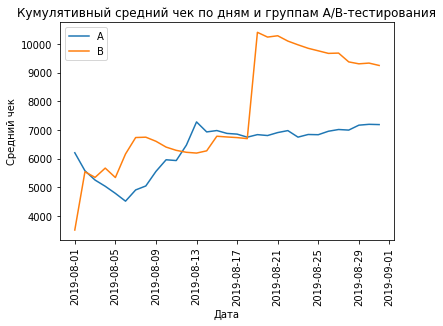

In [27]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title("Кумулятивный средний чек по дням и группам A/B-тестирования")
plt.legend() 
plt.xticks(rotation=90)
plt.show()



Группа В вырвалась вперед по показателям выручки, но проверяемые данные сырые, необходимо удалить из нихвыбросы, особо крупные покупки.Для этого построим графики среднего чека по группам.

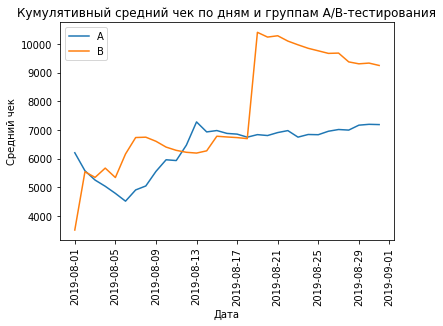

In [28]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title("Кумулятивный средний чек по дням и группам A/B-тестирования")
plt.legend() 
plt.xticks(rotation=90)
plt.show()

На графике видно что коммулятивный средний чек группы В совершил резкий скачек, но потом пошел на понижении.

Построим график относительно различия кумулятивного среднего чека группы B к группе A.

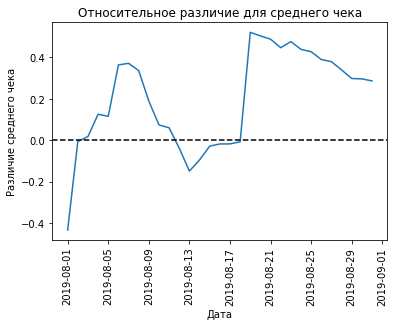

In [29]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Различие среднего чека')
plt.title("Относительное различие для среднего чека")
plt.xticks(rotation=90)
plt.show()

Картина подтверждается, нужно найти аномалии

Аналогично проанализируем график кумулятивной конверсии

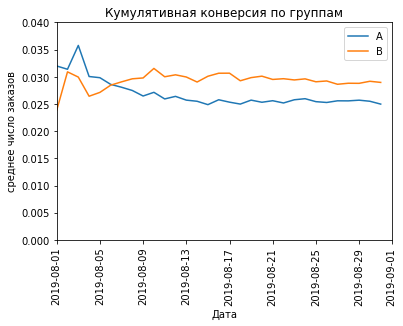

In [30]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.04])
plt.xlabel('Дата')
plt.ylabel('среднее число заказов')
plt.title("Кумулятивная конверсия по группам")
plt.xticks(rotation=90)
plt.show()


В начале теста сегмент А имел большую конверсию, затем он немного упал и вышел на плато, в отличие от сегмента В.

Построим график относительного различия кумулятивных конверсий:

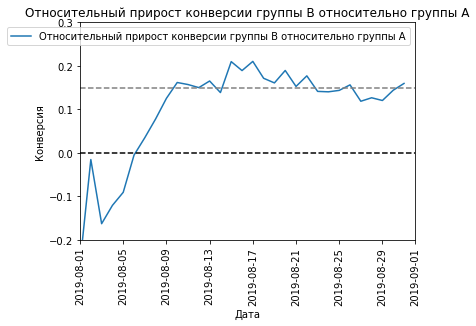

In [31]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01', format = '%Y-%m-%d'),
             pd.to_datetime('2019-09-01', format = '%Y-%m-%d'), -0.2, 0.3])
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title("Относительный прирост конверсии группы В относительно группы А")
plt.xticks(rotation=90)
plt.show()

Прирост группы В местами достигает 20%,но все же выавнивается в пределах 15%

#Изучим гистограмму распределения стоимостей заказов

#Из такой гистаграммы не возможно сделать какие-либо выводы, постоитм точечную гистаграмму

     visitor_id  transaction_id
908  3967698036               3
55    249864742               3
478  2108163459               3
687  2988190573               3
890  3908431265               3
138   611059232               3
632  2742574263               3
157   678354126               2
323  1404560065               2
452  1985475298               2


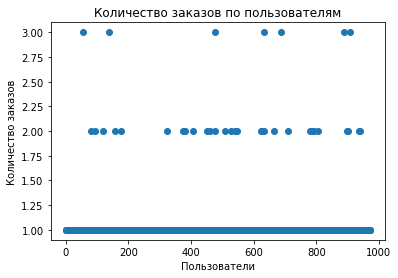

In [32]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'transaction_id']

print(ordersByUsers.sort_values(by='transaction_id', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transaction_id']) 
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям")
plt.show()

В основном покупатели совершают 1-2 покупки, все что более можно считать аномалиями, но для того что бы убедиться в этом, посчитаем процентили количества заказов на пользователя 95 и 99.

In [33]:
print(np.percentile(ordersByUsers['transaction_id'], [95, 99])) 

[1. 2.]


как видим не более 5% пользователей совершали более 2-х заказов, и всего 1% пользователей совершали более 4-х покупок 

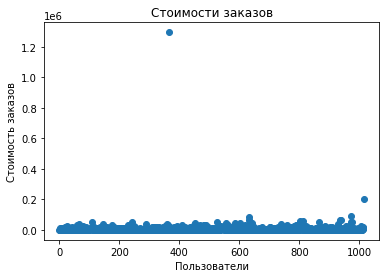

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title("Стоимости заказов")
plt.show()

аномалии присутствуют и в стоимости заказов, посмотрим процент таких аномалий с помощью процентиля 95 и 99

In [35]:
print(orders.head(10))
print(np.percentile(orders['revenue'], [95, 99])) 

    transaction_id  visitor_id       date  revenue group
0       3667963787  3312258926 2019-08-15     1650     B
1       2804400009  3642806036 2019-08-15      730     B
3       3797467345  1196621759 2019-08-15     9759     B
4       2282983706  2322279887 2019-08-15     2308     B
5        182168103   935554773 2019-08-15     2210     B
6        398296753  2900797465 2019-08-15     1860     B
7       2626614568    78758296 2019-08-15     1044     A
8       1576988021   295230930 2019-08-15    13710     A
9       1506739906  1882260405 2019-08-15     1855     B
10      3649131742   879864040 2019-08-15     4008     A
[26785. 53904.]


не более 5% пользователей заказывали на сумму 28 т.р. и более, и всего 1% на сууму 58,23 т.р и более

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.
Сформулируем гипотезы:
Н0- Конверсии группы А распределены нормально;
Н1- Конверсии гуппы А не распределены нормально;
Уровень статистической значимости 5%

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [37]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [38]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id'] 
sampleA = pd.concat([ordersByUsersA['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])), name='orders')],axis=0)
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительные различия: 0.160


P-value значительно меньше 0.05, значит стоит отвергнуть нулевую гипотезу. Анализ "сырых данных" сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 16 %.

Сравним средние чеки по сырым данным, а затем проделаем те же самые действия с выборкой без выбросов.Н0 -Средние чеки групп A и B равны, статистически значимых отличий нет H1- Средние чеки групп A и B различны, статистически значимые отличия есть.Уровень статистической значимости 5%

In [39]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.829
Относительные различия: 0.287


P-value значительно больше 0.05, статистически значимых отличий в среднем чеке между группами нет. Относительное различие между чеками около 26%. Почстим данные и посчитаем те же метрики.

уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [40]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > 4]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > 4]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 


1099    148427295
928     204675465
684     358944393
648     382846391
751     689129267
Name: visitor_id, dtype: int64
48


Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:
Сформулиуем гипотезы:
H0-Конверсии групп A и B равны, статистически значимых отличий нет;
H1-Конверсии групп A и B различны, статистически значимые отличия есть;
5% критический уровень статистической значимости.

In [41]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.013
Относительные различия: 0.162


статистическая значимость достигнута,группа В лучше грруппа А, отметим, что данные теста по сырым данным и по очищенным показали один и тот же результат, есть не существенные различия P-value, но процент относительных различий не изменился.

Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.
Сформулируем гиотезы :
H0-Средние чеки групп A и B равны, статистически значимых отличий нет;
H1:Средние чеки групп A и B различны, статистически значимые отличия есть
5% критический уровень статистической значимости.

In [42]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.862
Относительные различия: -0.028


P-value: 0.829  по сырым данным  отличаются от P-value: 0.862 по очищенным данным на 0,033, относительные различия изменились с 0,287 на -0,028 нужно обратить внимание на разницу между средним чеком. Она упала с 29% в пользу B до 3% в пользу A статистически значимых различий по этой метрике между группами нет, а наблюдаемая на неочищенных данных разница как мы и предполагали была связана с выбросами.




Мы видим статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
По сырым данным нет статистически значимого различия по среднему чеку между группами, как и после удаления выбросов.
График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
Различия среднего чека колеблется: благодая чему мы смогли найти аномалии. Сделать из этого графика определённые выводы нельзя.
Есть вариант остановить тест, признать победу группы В.
Думаю, что при продолжении теста разница между группами в конверсиях либо среднем чеке изменяться на непродолжительный период времени и не на критиески значимую сумму, т.к. колебания в графиках носят затухающий характер.
